In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
masterbuild = pd.read_csv("../data/processed/masterbuild_master.csv")
gifted = masterbuild[masterbuild['aig'] == 'Y']
rest = masterbuild[masterbuild['aig'] == 'N']
curtest = pd.read_csv("../data/processed/curtest_master.csv")

/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/849830127.py:1: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  masterbuild = pd.read_csv("../data/processed/masterbuild_master.csv")
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/849830127.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  curtest = pd.read_csv("../data/processed/curtest_master.csv")


In [16]:
# Step 1: Find mastids that appear more than twice
mastid_counts = gifted['mastid'].value_counts()
mastids_more_than_twice = mastid_counts[mastid_counts > 2].index

# Step 2: Filter the DataFrame to include only those mastids
gifted_filtered = gifted[gifted['mastid'].isin(mastids_more_than_twice)]

# Step 3: View the result
print(gifted_filtered)


           mastid  lea  schlcode  grade ethnic sex aig aig_code eds  \
233     7806276.0  180       376      9      H   F   Y       AM   Y   
320     7481646.0  610       334     11      W   M   Y       AG   N   
321     7481646.0  060       700     11      W   M   Y       AG   N   
3578    7463009.0  340       454      9      W   M   Y       AG   N   
3999    7465765.0  340       382      9      W   M   Y       AG   N   
...           ...  ...       ...    ...    ...  ..  ..      ...  ..   
682895  9023948.0  620       339      7      W   M   Y       IG   N   
682898  9644831.0  470       442      6      W   F   Y       AG   N   
682905  9427541.0  350       312      6      W   F   Y       AR   Y   
682909  9460601.0  180       320     10      W   M   Y       AG   N   
682910  9250577.0  410       325      6      W   F   Y       AG   N   

        reporting_year  mpw  
233             2018.0  NaN  
320             2018.0  NaN  
321             2018.0  NaN  
3578            2018.0  NaN

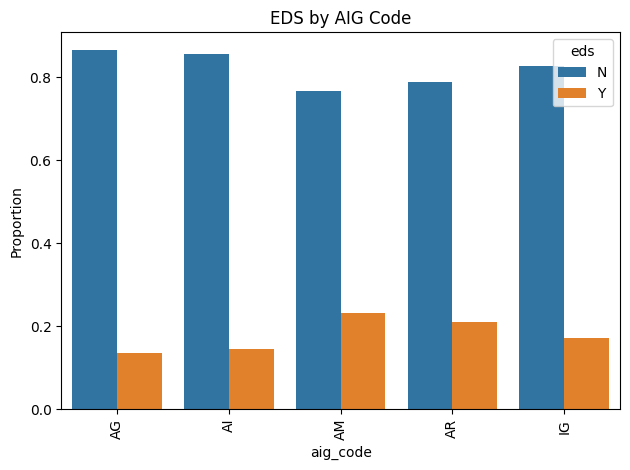

In [17]:
counts = gifted.groupby(['aig_code', 'eds']).size().reset_index(name='count')

# Calculate total per aig_code
counts['total'] = counts.groupby('aig_code')['count'].transform('sum')

# Compute proportions
counts['proportion'] = counts['count'] / counts['total']
sns.barplot(data=counts, x='aig_code', y='proportion', hue='eds')
plt.ylabel('Proportion')
plt.title('EDS by AIG Code')
plt.xticks(rotation=90)  # Optional: rotates x labels if they’re long
plt.tight_layout()
plt.show()


In [32]:
gifted['year'] = gifted['reporting_year']
gifted.drop(columns=['reporting_year'],inplace=True)
curtest.drop(columns=['testdt','lea','schlcode','grade','AST','BRL','BRW','CAB','DSC','EBN','EXT','ISC','LPR','MAG','MLT','MRK','OIP','RAS','SRM','TRA','TRD','year_test'],inplace=True)
gifted_test = pd.merge(gifted, curtest, on=['year', 'mastid'], how='inner', suffixes=('_gifted', '_curtest'))



rest['year'] = rest['reporting_year']
rest.drop(columns=['reporting_year'],inplace=True)
rest_test = pd.merge(rest, curtest, on=['year', 'mastid'], how='inner', suffixes=('_rest', '_curtest'))


/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/3076692706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifted['year'] = gifted['reporting_year']
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/3076692706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifted.drop(columns=['reporting_year'],inplace=True)
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/3076692706.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [33]:
# Step 1: Find common mastids
common_mastids = set(rest['mastid']) & set(gifted['mastid'])

# Step 2: Filter both DataFrames by mastid
rest_test_filtered = rest_test[rest_test['mastid'].isin(common_mastids)]
gifted_test_filtered = gifted_test[gifted_test['mastid'].isin(common_mastids)]

# Step 3: Concatenate the filtered DataFrames
result = pd.concat([rest_test_filtered, gifted_test_filtered])
##THIS RESULT IS SUPER INTERESTING -- ARE THERE CHANGES WHEN A STUDENT IS CHANGED TO GIFTED?

/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/774071325.py:28: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  transitions = filtered.groupby('mastid').apply(find_n_to_y_transitions).dropna()
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_26521/774071325.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transitions = filtered.groupby('mastid').apply(find_n_to_y_transitions).dropna()


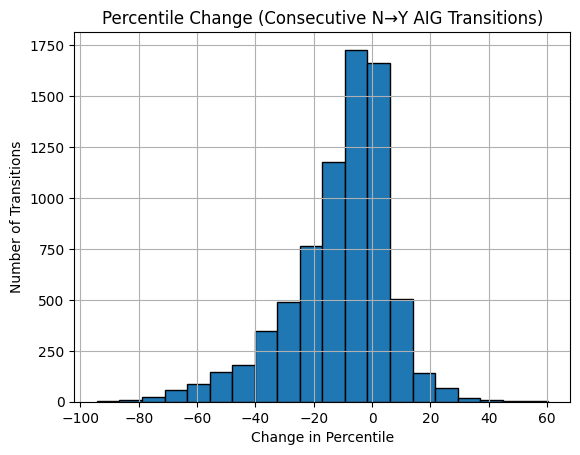

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter for test_id starting with "M"
filtered = result[result['test_id'].str.startswith('M')]

# Step 2: Sort by mastid and year
filtered = filtered.sort_values(by=['mastid', 'year'])

# Step 3: Define logic to look for N (null) → Y transitions
def find_n_to_y_transitions(group):
    group = group.sort_values(by='year')
    
    # Treat NaN aig_code as "N"
    codes = group['aig_code'].fillna('N').values
    years = group['year'].values
    percentiles = group['percentile'].values

    diffs = []
    for i in range(len(group) - 1):
        if codes[i] == 'N' and codes[i + 1] == 'AM':
            if years[i + 1] == years[i] + 1:  # ensure consecutive years
                diff = percentiles[i + 1] - percentiles[i]
                diffs.append(diff)
    return pd.Series(diffs)

# Step 4: Apply to each student
transitions = filtered.groupby('mastid').apply(find_n_to_y_transitions).dropna()

# Step 5: Flatten result
percentile_changes = transitions.reset_index(drop=True)

# Step 6: Plot histogram
plt.hist(percentile_changes, bins=20, edgecolor='black')
plt.title('Percentile Change (Consecutive N→Y AIG Transitions)')
plt.xlabel('Change in Percentile')
plt.ylabel('Number of Transitions')
plt.grid(True)
plt.show()
